In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
df = pd.read_csv('/opt/anaconda3/futuraplan.csv')
#df.shape
df['DATE'] = pd.to_datetime(df['DATE'])

date = (df['DATE'] - dt.datetime(2017,1,1)).dt.total_seconds()
guests = df['GUESTS']
vol = df['VOL']
check_av = df['AVCHECK']

# Split data into train / test sets
train_V = vol.iloc[:len(vol)-4]
test_V = vol.iloc[len(vol)-4:] # set one year(12 months) for testing
train_D = date.iloc[:len(date)-4]
test_D = date.iloc[len(date)-4:] # set one year(12 months) for testing

olsmod = sm.OLS(train_V,train_D)
olsres = olsmod.fit()
print(olsres.summary())

                                 OLS Regression Results                                
Dep. Variable:                    VOL   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              98.40
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                    5.99e-09
Time:                        18:52:45   Log-Likelihood:                         -322.24
No. Observations:                  20   AIC:                                      646.5
Df Residuals:                      19   BIC:                                      647.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [4]:

pred = olsres.predict(train_D)
print(pred)

0     4.295049e+06
1     4.416755e+06
2     4.530609e+06
3     4.652316e+06
4     4.770096e+06
5     4.891802e+06
6     5.009582e+06
7     5.131288e+06
8     5.252994e+06
9     5.370775e+06
10    5.492481e+06
11    5.610261e+06
12    5.731967e+06
13    5.853673e+06
14    5.963601e+06
15    6.085307e+06
16    6.203088e+06
17    6.324794e+06
18    6.442574e+06
19    6.564280e+06
dtype: float64


In [5]:

newpred =  olsres.predict(test_D) # predict out of sample
print(newpred)


20    6.685986e+06
21    6.803766e+06
22    6.925472e+06
23    7.043253e+06
dtype: float64


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50901D+01    |proj g|=  2.29921D-02

At iterate    1    f=  1.50887D+01    |proj g|=  2.44935D-02

At iterate    2    f=  1.50881D+01    |proj g|=  2.62735D-02

At iterate    3    f=  1.50876D+01    |proj g|=  1.40005D-02

At iterate    4    f=  1.50870D+01    |proj g|=  8.64345D-03

At iterate    5    f=  1.50869D+01    |proj g|=  1.54481D-03

At iterate    6    f=  1.50869D+01    |proj g|=  2.13433D-05

At iterate    7    f=  1.50869D+01    |proj g|=  3.13882D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

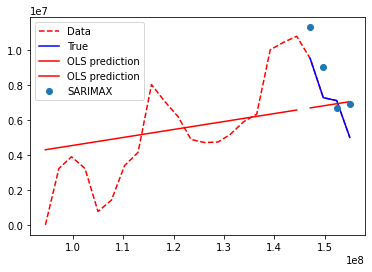

In [100]:
model = SARIMAX(vol, order=(1, 1, 1), seasonal_order=(1, 0, 0, 12)).fit(disp=True)
yhat = model.predict(len(train_V), len(test_V+train_V)-1,dynamic=False,extend_kwargs=None)

fig, ax = plt.subplots()
ax.plot(date, vol, 'r--', label="Data")
ax.plot(test_D, test_V, 'b-', label="True")
ax.plot(train_D, pred, 'r', label="OLS prediction")
ax.plot(test_D, newpred, 'r', label="OLS prediction")
ax.plot(test_D, yhat, 'o', label="SARIMAX")
ax.legend(loc="best");